In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.patches as mpatches 
import os

In [2]:
df=pd.read_csv('nuts2_hourly_combined.csv')
nan_count_initial = df.isna().sum().sum()
print("nan_count = " , nan_count_initial )
df.head() 

C:\Users\hilal\AppData\Local\Temp\ipykernel_11260\425620575.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

nan_count =  1181


Unnamed: 0    Commerce  Commerce.1  Commerce.2  Commerce.3  \
0                        NaN  Space Heat  Space Heat  Space Heat  Space Heat   
1                        NaN        DE11        DE12        DE13        DE14   
2                        NaN          kw          kw          kw          kw   
3              utc_timestamp         NaN         NaN         NaN         NaN   
4  2019-01-01 00:00:00+01:00   597150.55   358042.39   308337.68   293647.17   

   Commerce.4  Commerce.5  Commerce.6  Commerce.7  Commerce.8  ...  \
0  Space Heat  Space Heat  Space Heat  Space Heat  Space Heat  ...   
1        DE21        DE22        DE23        DE24        DE25  ...   
2          kw          kw          kw          kw          kw  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4   826026.49   234322.51   193907.85   162219.09   278519.99  ...   

  Mobility.256 Mobility.257 Mobility.258 Mobility.259 Mobility.260  \
0  service_Oth  service_Oth  service_Oth  service_Oth  service_Oth   
1         DEB1         DEB2         DEB3         DEC0         DED2   
2           km           km           km           km           km   
3          NaN          NaN          NaN          NaN          NaN   
4       756.62       308.78       915.19       429.53       874.72   

  Mobility.261 Mobility.262 Mobility.263 Mobility.264 Mobility.265  
0  service_Oth  service_Oth  service_Oth  service_Oth  service_Oth  
1         DED4         DED5         DEE0         DEF0         DEG0  
2           km           km           km           km           km  
3          NaN          NaN          NaN          NaN          NaN  
4       791.12       500.25      1456.84      1768.14      1307.69  

[5 rows x 1179 columns]

In [3]:
df = df.drop([2,3])#to remove nan values from specific rows
df = df.rename(columns= {'Unnamed: 0' : 'timestamp'})
df.head()

for column in df.columns[1:]:
    df.at[0,column] = column + '-' + df.at[0,column] + '-' + df.at[1,column]

df.head()
    

timestamp                  Commerce  \
0                        NaN  Commerce-Space Heat-DE11   
1                        NaN                      DE11   
4  2019-01-01 00:00:00+01:00                 597150.55   
5  2019-01-01 01:00:00+01:00                  526013.6   
6  2019-01-01 02:00:00+01:00                  453376.6   

                   Commerce.1                  Commerce.2  \
0  Commerce.1-Space Heat-DE12  Commerce.2-Space Heat-DE13   
1                        DE12                        DE13   
4                   358042.39                   308337.68   
5                   320393.48                   275915.32   
6                   280020.06                   241146.69   

                   Commerce.3                  Commerce.4  \
0  Commerce.3-Space Heat-DE14  Commerce.4-Space Heat-DE21   
1                        DE14                        DE21   
4                   293647.17                   826026.49   
5                   258665.77                   727624.16   
6                   222946.71                   627146.83   

                   Commerce.5                  Commerce.6  \
0  Commerce.5-Space Heat-DE22  Commerce.6-Space Heat-DE23   
1                        DE22                        DE23   
4                   234322.51                   193907.85   
5                    206408.3                    175314.0   
6                   177905.46                   154747.84   

                   Commerce.7                  Commerce.8  ...  \
0  Commerce.7-Space Heat-DE24  Commerce.8-Space Heat-DE25  ...   
1                        DE24                        DE25  ...   
4                   162219.09                   278519.99  ...   
5                   146663.88                   245340.64  ...   
6                   129458.68                   211461.65  ...   

                    Mobility.256                   Mobility.257  \
0  Mobility.256-service_Oth-DEB1  Mobility.257-service_Oth-DEB2   
1                           DEB1                           DEB2   
4                         756.62                         308.78   
5                        1570.82                         641.06   
6                        1583.09                         646.06   

                    Mobility.258                   Mobility.259  \
0  Mobility.258-service_Oth-DEB3  Mobility.259-service_Oth-DEC0   
1                           DEB3                           DEC0   
4                         915.19                         429.53   
5                        1900.03                         891.75   
6                        1914.86                         898.71   

                    Mobility.260                   Mobility.261  \
0  Mobility.260-service_Oth-DED2  Mobility.261-service_Oth-DED4   
1                           DED2                           DED4   
4                         874.72                         791.12   
5                        1816.01                        1642.45   
6                        1830.18                        1655.27   

                    Mobility.262                   Mobility.263  \
0  Mobility.262-service_Oth-DED5  Mobility.263-service_Oth-DEE0   
1                           DED5                           DEE0   
4                         500.25                        1456.84   
5                        1038.58                        3024.56   
6                        1046.69                        3048.18   

                    Mobility.264                   Mobility.265  
0  Mobility.264-service_Oth-DEF0  Mobility.265-service_Oth-DEG0  
1                           DEF0                           DEG0  
4                        1768.14                        1307.69  
5                        3670.85                        2714.92  
6                        3699.51                        2736.11  

[5 rows x 1179 columns]

In [4]:
for col in df.columns[1:]:
    df.rename(columns = {col : f"{df.at[0,col] }" },inplace = True )

df = df.drop(0).reset_index(drop = True).drop([0])

nan_count = df.isna().sum().sum() 

print("nan_count = " , nan_count )
df.head()

# to save cleaned data as a new .csv file
df.to_csv('nuts2_hourly_combined_cleaned.csv' , index = False)

nan_count =  0


In [5]:
df_cleaned = pd.read_csv('nuts2_hourly_combined_cleaned.csv') #cleaned data
df_cleaned.columns

Index(['timestamp', 'Commerce-Space Heat-DE11', 'Commerce.1-Space Heat-DE12',
       'Commerce.2-Space Heat-DE13', 'Commerce.3-Space Heat-DE14',
       'Commerce.4-Space Heat-DE21', 'Commerce.5-Space Heat-DE22',
       'Commerce.6-Space Heat-DE23', 'Commerce.7-Space Heat-DE24',
       'Commerce.8-Space Heat-DE25',
       ...
       'Mobility.256-service_Oth-DEB1', 'Mobility.257-service_Oth-DEB2',
       'Mobility.258-service_Oth-DEB3', 'Mobility.259-service_Oth-DEC0',
       'Mobility.260-service_Oth-DED2', 'Mobility.261-service_Oth-DED4',
       'Mobility.262-service_Oth-DED5', 'Mobility.263-service_Oth-DEE0',
       'Mobility.264-service_Oth-DEF0', 'Mobility.265-service_Oth-DEG0'],
      dtype='object', length=1179)

In [6]:
#subsector names and data files were created
sub_sector_names = ['Commerce', 'Industry', 'Residential', 'Mobility']

output_dir = 'sectoral_distribution'
os.makedirs(output_dir, exist_ok=True)


for sub_dir in sub_sector_names:
    dir_path = os.path.join(output_dir, sub_dir)
    os.makedirs(dir_path, exist_ok=True)


#iteration for subsectors
for sector_iter in sub_sector_names:
    sector_columns = [col for col in df_cleaned.columns if col.startswith(sector_iter)]
    df_sector = df_cleaned[sector_columns]
    print('sector_name' , sector_iter)
    
    unique_values = set() 
    
    for col in df_sector.columns: 
        part = col.split('-')[1]
        unique_values.add(part)
        
    for iter_consumption_type in unique_values:
        print('consumption_type = ' , iter_consumption_type ) 
        filtered_columns = [col for col in df_sector.columns if f"-{iter_consumption_type}-" in col]

        df_filtered = df[filtered_columns]
        
        new_column_names = [col.split('-')[-1] for col in filtered_columns]#names for NUTS2 regions
        df_filtered.columns = new_column_names
        
        
        df_filtered = pd.concat([df['timestamp'].to_frame(),df_filtered] , axis = 1)
        
        df_filtered = df_filtered.loc[:,~df_filtered.columns.duplicated()] # duplicated columns were dropped
        
        #to create sectoral distribution datasets for using in deep learning process
        df_filtered.to_csv(f"sectoral_distribution/{sector_iter}/{sector_iter[:3].lower()}_{iter_consumption_type.lower().replace(' ','_')}.csv")# herbiri csv kaydedildi
        



sector_name Commerce
consumption_type =  Hot Water
consumption_type =  Mechanical
consumption_type =  Information
consumption_type =  Space Heat
consumption_type =  Light
consumption_type =  Process Cooling
consumption_type =  Space Cooling
consumption_type =  Process Heat
sector_name Industry
consumption_type =  Hot Water
consumption_type =  Mechanical
consumption_type =  Information
consumption_type =  Space Heat
consumption_type =  Light
consumption_type =  Process Cooling
consumption_type =  Space Cooling
consumption_type =  Process Heat
sector_name Residential
consumption_type =  Hot Water
consumption_type =  Mechanical
consumption_type =  Information
consumption_type =  Space Heat
consumption_type =  Light
consumption_type =  Process Cooling
consumption_type =  Space Cooling
consumption_type =  Process Heat
sector_name Mobility
consumption_type =  service_Tru_gr_35
consumption_type =  Mechanical
consumption_type =  service_Pas
consumption_type =  service_Tru_sm_35
consumption_typ

In [7]:
comdf1 = pd.read_csv('sectoral_distribution/Commerce/com_hot_water.csv', parse_dates = ['timestamp'])
comdf2 = pd.read_csv('sectoral_distribution/Commerce/com_information.csv', parse_dates = ['timestamp'])
comdf3 = pd.read_csv('sectoral_distribution/Commerce/com_light.csv', parse_dates = ['timestamp'])
comdf4 = pd.read_csv('sectoral_distribution/Commerce/com_mechanical.csv', parse_dates = ['timestamp'])
comdf5 = pd.read_csv('sectoral_distribution/Commerce/com_process_cooling.csv', parse_dates = ['timestamp'])
comdf6 = pd.read_csv('sectoral_distribution/Commerce/com_process_heat.csv', parse_dates = ['timestamp'])
comdf7 = pd.read_csv('sectoral_distribution/Commerce/com_space_cooling.csv', parse_dates = ['timestamp'])
comdf8 = pd.read_csv('sectoral_distribution/Commerce/com_space_heat.csv', parse_dates = ['timestamp'])


In [8]:
comdf1["hotwater_commercial"] = comdf1.iloc[:, 2:].sum(axis= 1)
comdf1["information_commercial"] = comdf2.iloc[:, 2:].sum(axis= 1)
comdf1["light_commercial"] = comdf3.iloc[:, 2:].sum(axis= 1)
comdf1["mechanical_commercial"] = comdf4.iloc[:, 2:].sum(axis= 1)
comdf1["process_cooling_commercial"] = comdf5.iloc[:, 2:].sum(axis= 1)
comdf1["process_heat_commercial"] = comdf6.iloc[:, 2:].sum(axis= 1)
comdf1["space_cooling_commercial"] = comdf7.iloc[:, 2:].sum(axis= 1)
comdf1["space_heat_commercial"] = comdf8.iloc[:, 2:].sum(axis= 1)
comdf1 = comdf1.drop('Unnamed: 0' , axis = 1)
comdf1.head()


timestamp      DE11      DE12      DE13      DE14      DE21  \
0 2019-01-01 00:00:00+01:00  50619.26  32687.67  28149.85  24891.88  70020.61   
1 2019-01-01 01:00:00+01:00  45620.08  29459.42  25369.76  22433.55  63105.35   
2 2019-01-01 02:00:00+01:00  40014.31  25839.47  22252.34  19676.93  55351.00   
3 2019-01-01 03:00:00+01:00  35893.65  23178.53  19960.80  17650.61  49650.98   
4 2019-01-01 04:00:00+01:00  35036.06  22624.73  19483.88  17228.89  48464.68   

       DE22      DE23      DE24      DE25  ...      DEF0      DEG0  \
0  19863.05  16180.25  13536.05  23609.58  ...  40871.31  26345.95   
1  17901.37  14582.29  12199.22  21277.89  ...  36834.85  23744.01   
2  15701.66  12790.42  10700.19  18663.28  ...  32308.60  20826.36   
3  14084.71  11473.27   9598.29  16741.34  ...  28981.48  18681.67   
4  13748.19  11199.14   9368.96  16341.34  ...  28289.03  18235.31   

   hotwater_commercial  information_commercial  light_commercial  \
0           1083602.78              1389809.97         222723.70   
1            976585.84              1252551.88         200727.43   
2            856583.52              1098639.06         176062.15   
3            768372.90               985501.60         157931.34   
4            750014.34               961955.24         154157.94   

   mechanical_commercial  process_cooling_commercial  process_heat_commercial  \
0             2253498.59                  2217229.40               1777469.11   
1             2030942.31                  1998255.09               1601925.70   
2             1781381.31                  1752710.69               1405081.97   
3             1597935.34                  1572217.24               1260387.23   
4             1559756.22                  1534652.58               1230273.04   

   space_cooling_commercial  space_heat_commercial  
0                 827285.42            12940474.32  
1                 745582.42            11813564.10  
2                 653965.67            10469828.79  
3                 586620.58             9409533.80  
4                 572604.56             9193863.27  

[5 rows x 47 columns]

In [9]:
sectoral_dir = 'training_data_sectoral'
os.makedirs(sectoral_dir, exist_ok=True)

commercial_shape = comdf1.iloc[: ,np.r_[0,-8:0]].set_index('timestamp')
commercial_shape.to_csv('training_data_sectoral/commercial_training_data.csv' )
commercial_shape.head()


hotwater_commercial  information_commercial  \
timestamp                                                                
2019-01-01 00:00:00+01:00           1083602.78              1389809.97   
2019-01-01 01:00:00+01:00            976585.84              1252551.88   
2019-01-01 02:00:00+01:00            856583.52              1098639.06   
2019-01-01 03:00:00+01:00            768372.90               985501.60   
2019-01-01 04:00:00+01:00            750014.34               961955.24   

                           light_commercial  mechanical_commercial  \
timestamp                                                            
2019-01-01 00:00:00+01:00         222723.70             2253498.59   
2019-01-01 01:00:00+01:00         200727.43             2030942.31   
2019-01-01 02:00:00+01:00         176062.15             1781381.31   
2019-01-01 03:00:00+01:00         157931.34             1597935.34   
2019-01-01 04:00:00+01:00         154157.94             1559756.22   

                           process_cooling_commercial  \
timestamp                                               
2019-01-01 00:00:00+01:00                  2217229.40   
2019-01-01 01:00:00+01:00                  1998255.09   
2019-01-01 02:00:00+01:00                  1752710.69   
2019-01-01 03:00:00+01:00                  1572217.24   
2019-01-01 04:00:00+01:00                  1534652.58   

                           process_heat_commercial  space_cooling_commercial  \
timestamp                                                                      
2019-01-01 00:00:00+01:00               1777469.11                 827285.42   
2019-01-01 01:00:00+01:00               1601925.70                 745582.42   
2019-01-01 02:00:00+01:00               1405081.97                 653965.67   
2019-01-01 03:00:00+01:00               1260387.23                 586620.58   
2019-01-01 04:00:00+01:00               1230273.04                 572604.56   

                           space_heat_commercial  
timestamp                                         
2019-01-01 00:00:00+01:00            12940474.32  
2019-01-01 01:00:00+01:00            11813564.10  
2019-01-01 02:00:00+01:00            10469828.79  
2019-01-01 03:00:00+01:00             9409533.80  
2019-01-01 04:00:00+01:00             9193863.27

In [10]:
commercial_percentage = commercial_shape.divide(commercial_shape.sum(axis = 1), axis = 0)
commercial_percentage.head()

hotwater_commercial  information_commercial  \
timestamp                                                                
2019-01-01 00:00:00+01:00             0.047710                0.061193   
2019-01-01 01:00:00+01:00             0.047361                0.060744   
2019-01-01 02:00:00+01:00             0.047080                0.060384   
2019-01-01 03:00:00+01:00             0.047028                0.060318   
2019-01-01 04:00:00+01:00             0.047001                0.060283   

                           light_commercial  mechanical_commercial  \
timestamp                                                            
2019-01-01 00:00:00+01:00          0.009806               0.099220   
2019-01-01 01:00:00+01:00          0.009735               0.098493   
2019-01-01 02:00:00+01:00          0.009677               0.097909   
2019-01-01 03:00:00+01:00          0.009666               0.097802   
2019-01-01 04:00:00+01:00          0.009661               0.097746   

                           process_cooling_commercial  \
timestamp                                               
2019-01-01 00:00:00+01:00                    0.097623   
2019-01-01 01:00:00+01:00                    0.096908   
2019-01-01 02:00:00+01:00                    0.096333   
2019-01-01 03:00:00+01:00                    0.096228   
2019-01-01 04:00:00+01:00                    0.096173   

                           process_heat_commercial  space_cooling_commercial  \
timestamp                                                                      
2019-01-01 00:00:00+01:00                 0.078261                  0.036425   
2019-01-01 01:00:00+01:00                 0.077687                  0.036158   
2019-01-01 02:00:00+01:00                 0.077227                  0.035944   
2019-01-01 03:00:00+01:00                 0.077142                  0.035904   
2019-01-01 04:00:00+01:00                 0.077098                  0.035884   

                           space_heat_commercial  
timestamp                                         
2019-01-01 00:00:00+01:00               0.569761  
2019-01-01 01:00:00+01:00               0.572914  
2019-01-01 02:00:00+01:00               0.575447  
2019-01-01 03:00:00+01:00               0.575912  
2019-01-01 04:00:00+01:00               0.576155

In [11]:
#Residential Analysis
resdf1 = pd.read_csv('sectoral_distribution/Residential/res_hot_water.csv', parse_dates = ['timestamp'])
resdf2 = pd.read_csv('sectoral_distribution/Residential/res_information.csv', parse_dates = ['timestamp'])
resdf3 = pd.read_csv('sectoral_distribution/Residential/res_light.csv', parse_dates = ['timestamp'])
resdf4 = pd.read_csv('sectoral_distribution/Residential/res_mechanical.csv', parse_dates = ['timestamp'])
resdf5 = pd.read_csv('sectoral_distribution/Residential/res_process_cooling.csv', parse_dates = ['timestamp'])
resdf6 = pd.read_csv('sectoral_distribution/Residential/res_process_heat.csv', parse_dates = ['timestamp'])
resdf7 = pd.read_csv('sectoral_distribution/Residential/res_space_cooling.csv', parse_dates = ['timestamp'])
resdf8 = pd.read_csv('sectoral_distribution/Residential/res_space_heat.csv', parse_dates = ['timestamp'])

resdf1["hotwater_residential"] = resdf1.iloc[:, 2:].sum(axis= 1) 
resdf1["information_residential"] = resdf2.iloc[:, 2:].sum(axis= 1)
resdf1["light_residential"] =resdf3.iloc[:, 2:].sum(axis= 1)
resdf1["mechanical_residential"] = resdf4.iloc[:, 2:].sum(axis= 1)
resdf1["process_cooling_residential"] = resdf5.iloc[:, 2:].sum(axis= 1)
resdf1["process_heat_residential"] = resdf6.iloc[:, 2:].sum(axis= 1)
resdf1["space_cooling_residential"] = resdf7.iloc[:, 2:].sum(axis= 1)
resdf1["space_heat_residential"] = resdf8.iloc[:, 2:].sum(axis= 1)
resdf1 = resdf1.drop('Unnamed: 0' , axis = 1)
resdf1.head()

timestamp      DE11      DE12      DE13   DE14      DE21  \
0 2019-01-01 00:00:00+01:00     70.04     35.46     40.21   0.00    145.80   
1 2019-01-01 01:00:00+01:00     81.56     76.08     23.71  31.45     81.41   
2 2019-01-01 02:00:00+01:00     61.25     42.73     55.00  42.49     12.59   
3 2019-01-01 03:00:00+01:00      0.00      0.00      0.00   0.00      0.00   
4 2019-01-01 04:00:00+01:00  26528.55  13431.55  15227.86   0.00  55221.86   

      DE22     DE23     DE24     DE25  ...     DEF0     DEG0  \
0     7.69     3.38    15.06     4.15  ...    14.87    23.95   
1    14.46     4.91    20.12    76.42  ...    76.09    86.24   
2    10.94    33.58    10.64    12.18  ...    37.36    17.92   
3     0.00     0.00     0.00     0.00  ...     0.00     0.00   
4  2913.63  1280.61  5703.36  1573.23  ...  5632.65  9071.77   

   hotwater_residential  information_residential  light_residential  \
0               1229.62               1288002.72           42547.15   
1               2526.21               1300208.80           42950.37   
2                769.04               1247696.35           41215.73   
3                  0.00               1241477.04           41010.28   
4             465714.01               1226649.75           40520.48   

   mechanical_residential  process_cooling_residential  \
0               264711.55                   5065846.96   
1               267220.14                   5113854.63   
2               256427.75                   4907317.79   
3               255149.53                   4882856.57   
4               252102.23                   4824539.29   

   process_heat_residential  space_cooling_residential  space_heat_residential  
0                2816670.34                  203228.10             62290744.54  
1                2843363.14                  205154.04             64305315.71  
2                2728526.27                  196868.36             70093167.50  
3                2714925.56                  195887.04             69079515.68  
4                2682500.44                  193547.49             65347542.50  

[5 rows x 47 columns]

In [12]:
residential_shape = resdf1.iloc[: ,np.r_[0,-8:0]].set_index('timestamp')
percentage_residential = residential_shape.divide(residential_shape.sum(axis=1),axis = 0)
residential_shape.to_csv('training_data_sectoral/residential_training_data.csv' )
percentage_residential.head()


hotwater_residential  information_residential  \
timestamp                                                                  
2019-01-01 00:00:00+01:00              0.000017                 0.017896   
2019-01-01 01:00:00+01:00              0.000034                 0.017551   
2019-01-01 02:00:00+01:00              0.000010                 0.015700   
2019-01-01 03:00:00+01:00              0.000000                 0.015833   
2019-01-01 04:00:00+01:00              0.006207                 0.016348   

                           light_residential  mechanical_residential  \
timestamp                                                              
2019-01-01 00:00:00+01:00           0.000591                0.003678   
2019-01-01 01:00:00+01:00           0.000580                0.003607   
2019-01-01 02:00:00+01:00           0.000519                0.003227   
2019-01-01 03:00:00+01:00           0.000523                0.003254   
2019-01-01 04:00:00+01:00           0.000540                0.003360   

                           process_cooling_residential  \
timestamp                                                
2019-01-01 00:00:00+01:00                     0.070385   
2019-01-01 01:00:00+01:00                     0.069031   
2019-01-01 02:00:00+01:00                     0.061749   
2019-01-01 03:00:00+01:00                     0.062273   
2019-01-01 04:00:00+01:00                     0.064299   

                           process_heat_residential  \
timestamp                                             
2019-01-01 00:00:00+01:00                  0.039135   
2019-01-01 01:00:00+01:00                  0.038382   
2019-01-01 02:00:00+01:00                  0.034333   
2019-01-01 03:00:00+01:00                  0.034624   
2019-01-01 04:00:00+01:00                  0.035751   

                           space_cooling_residential  space_heat_residential  
timestamp                                                                     
2019-01-01 00:00:00+01:00                   0.002824                0.865474  
2019-01-01 01:00:00+01:00                   0.002769                0.868045  
2019-01-01 02:00:00+01:00                   0.002477                0.881986  
2019-01-01 03:00:00+01:00                   0.002498                0.880995  
2019-01-01 04:00:00+01:00                   0.002579                0.870916

In [13]:
#Industrial Analysis
indf1 = pd.read_csv('sectoral_distribution/Industry/ind_hot_water.csv', parse_dates = ['timestamp'])
indf2 = pd.read_csv('sectoral_distribution/Industry/ind_information.csv', parse_dates = ['timestamp'])
indf3 = pd.read_csv('sectoral_distribution/Industry/ind_light.csv', parse_dates = ['timestamp'])
indf4 = pd.read_csv('sectoral_distribution/Industry/ind_mechanical.csv', parse_dates = ['timestamp'])
indf5 = pd.read_csv('sectoral_distribution/Industry/ind_process_cooling.csv', parse_dates = ['timestamp'])
indf6 = pd.read_csv('sectoral_distribution/Industry/ind_process_heat.csv', parse_dates = ['timestamp'])
indf7 = pd.read_csv('sectoral_distribution/Industry/ind_space_cooling.csv', parse_dates = ['timestamp'])
indf8 = pd.read_csv('sectoral_distribution/Industry/ind_space_heat.csv', parse_dates = ['timestamp'])

indf1["hotwater_industry"] = indf1.iloc[:, 2:].sum(axis= 1) 
indf1["information_industry"] = indf2.iloc[:, 2:].sum(axis= 1)
indf1["light_industry"] =indf3.iloc[:, 2:].sum(axis= 1)
indf1["mechanical_industry"] = indf4.iloc[:, 2:].sum(axis= 1)
indf1["process_cooling_industry"] =indf5.iloc[:, 2:].sum(axis= 1)
indf1["process_heat_industry"] = indf6.iloc[:, 2:].sum(axis= 1)
indf1["space_cooling_industry"] = indf7.iloc[:, 2:].sum(axis= 1)
indf1["space_heat_industry"] =indf8.iloc[:, 2:].sum(axis= 1)
indf1 = indf1.drop('Unnamed: 0' , axis = 1)
indf1.head()

timestamp      DE11      DE12      DE13     DE14      DE21  \
0 2019-01-01 00:00:00+01:00  21732.11  12007.00  10836.61  8308.16  18968.46   
1 2019-01-01 01:00:00+01:00  21105.44  11797.59  10667.78  8041.25  18667.80   
2 2019-01-01 02:00:00+01:00  20721.04  11615.61  10464.69  7879.93  18421.08   
3 2019-01-01 03:00:00+01:00  20336.65  11433.64  10261.61  7718.61  18174.35   
4 2019-01-01 04:00:00+01:00  21108.99  11642.25  10490.87  8078.18  18259.41   

      DE22     DE23     DE24     DE25  ...     DEF0     DEG0  \
0  5692.57  5987.42  5409.70  8304.03  ...  6236.00  8474.54   
1  5632.56  5917.93  5333.81  8233.88  ...  6130.98  8420.61   
2  5575.84  5824.39  5261.98  8100.97  ...  6050.11  8306.55   
3  5519.12  5730.86  5190.14  7968.07  ...  5969.24  8192.48   
4  5572.22  5830.78  5268.16  8070.41  ...  6054.79  8247.21   

   hotwater_industry  information_industry  light_industry  \
0          313078.97             542524.78        88242.59   
1          309193.02             535790.94        87147.33   
2          303831.38             526499.88        85636.14   
3          298469.78             517208.84        84124.88   
4          302219.55             523706.77        85181.80   

   mechanical_industry  process_cooling_industry  process_heat_industry  \
0           9425204.08                2311530.47            34443992.48   
1           9308217.61                2282839.58            34016470.67   
2           9146805.69                2243253.35            33426597.88   
3           8985393.76                2203667.02            32836725.12   
4           9098281.56                2231352.78            33249268.70   

   space_cooling_industry  space_heat_industry  
0              1334722.43           3897308.23  
1              1318155.75           3889395.39  
2              1295297.88           3855752.02  
3              1272440.01           3796477.51  
4              1288426.29           3847856.73  

[5 rows x 47 columns]

In [14]:
industrial_shape = indf1.iloc[: ,np.r_[0,-8:0]].set_index('timestamp')# last 8 energy types
industrial_shape.to_csv('training_data_sectoral/industrial_training_data.csv' )


percentage_industrial = industrial_shape.divide(industrial_shape.sum(axis=1),axis = 0)
percentage_industrial.head()


hotwater_industry  information_industry  \
timestamp                                                            
2019-01-01 00:00:00+01:00           0.005980              0.010362   
2019-01-01 01:00:00+01:00           0.005975              0.010354   
2019-01-01 02:00:00+01:00           0.005971              0.010347   
2019-01-01 03:00:00+01:00           0.005970              0.010345   
2019-01-01 04:00:00+01:00           0.005970              0.010345   

                           light_industry  mechanical_industry  \
timestamp                                                        
2019-01-01 00:00:00+01:00        0.001685             0.180019   
2019-01-01 01:00:00+01:00        0.001684             0.179879   
2019-01-01 02:00:00+01:00        0.001683             0.179759   
2019-01-01 03:00:00+01:00        0.001683             0.179728   
2019-01-01 04:00:00+01:00        0.001683             0.179715   

                           process_cooling_industry  process_heat_industry  \
timestamp                                                                    
2019-01-01 00:00:00+01:00                  0.044150               0.657873   
2019-01-01 01:00:00+01:00                  0.044115               0.657359   
2019-01-01 02:00:00+01:00                  0.044086               0.656922   
2019-01-01 03:00:00+01:00                  0.044078               0.656807   
2019-01-01 04:00:00+01:00                  0.044075               0.656759   

                           space_cooling_industry  space_heat_industry  
timestamp                                                               
2019-01-01 00:00:00+01:00                0.025493             0.074438  
2019-01-01 01:00:00+01:00                0.025473             0.075161  
2019-01-01 02:00:00+01:00                0.025456             0.075776  
2019-01-01 03:00:00+01:00                0.025452             0.075938  
2019-01-01 04:00:00+01:00                0.025450             0.076005

In [15]:
#Mobility Analysis
mob_df = pd.read_csv('sectoral_distribution/Mobility/mob_mechanical.csv', parse_dates = ['timestamp'])

mob_shape = mob_df.drop('Unnamed: 0' , axis = 1)
mob_shape['mobility_mechanical'] = mob_df.iloc[:,2:].sum(axis = 1)# only mechanical energy is based on kwh so I focused on this energy type
mob_shape = mob_shape.iloc[:,np.r_[0,39]]
mob_shape.to_csv('training_data_sectoral/mobility_training_data.csv' )
mob_shape.head()

timestamp  mobility_mechanical
0 2019-01-01 00:00:00+01:00           3778800.41
1 2019-01-01 01:00:00+01:00           3033271.85
2 2019-01-01 02:00:00+01:00           3184071.33
3 2019-01-01 03:00:00+01:00           1825358.61
4 2019-01-01 04:00:00+01:00           1499599.68

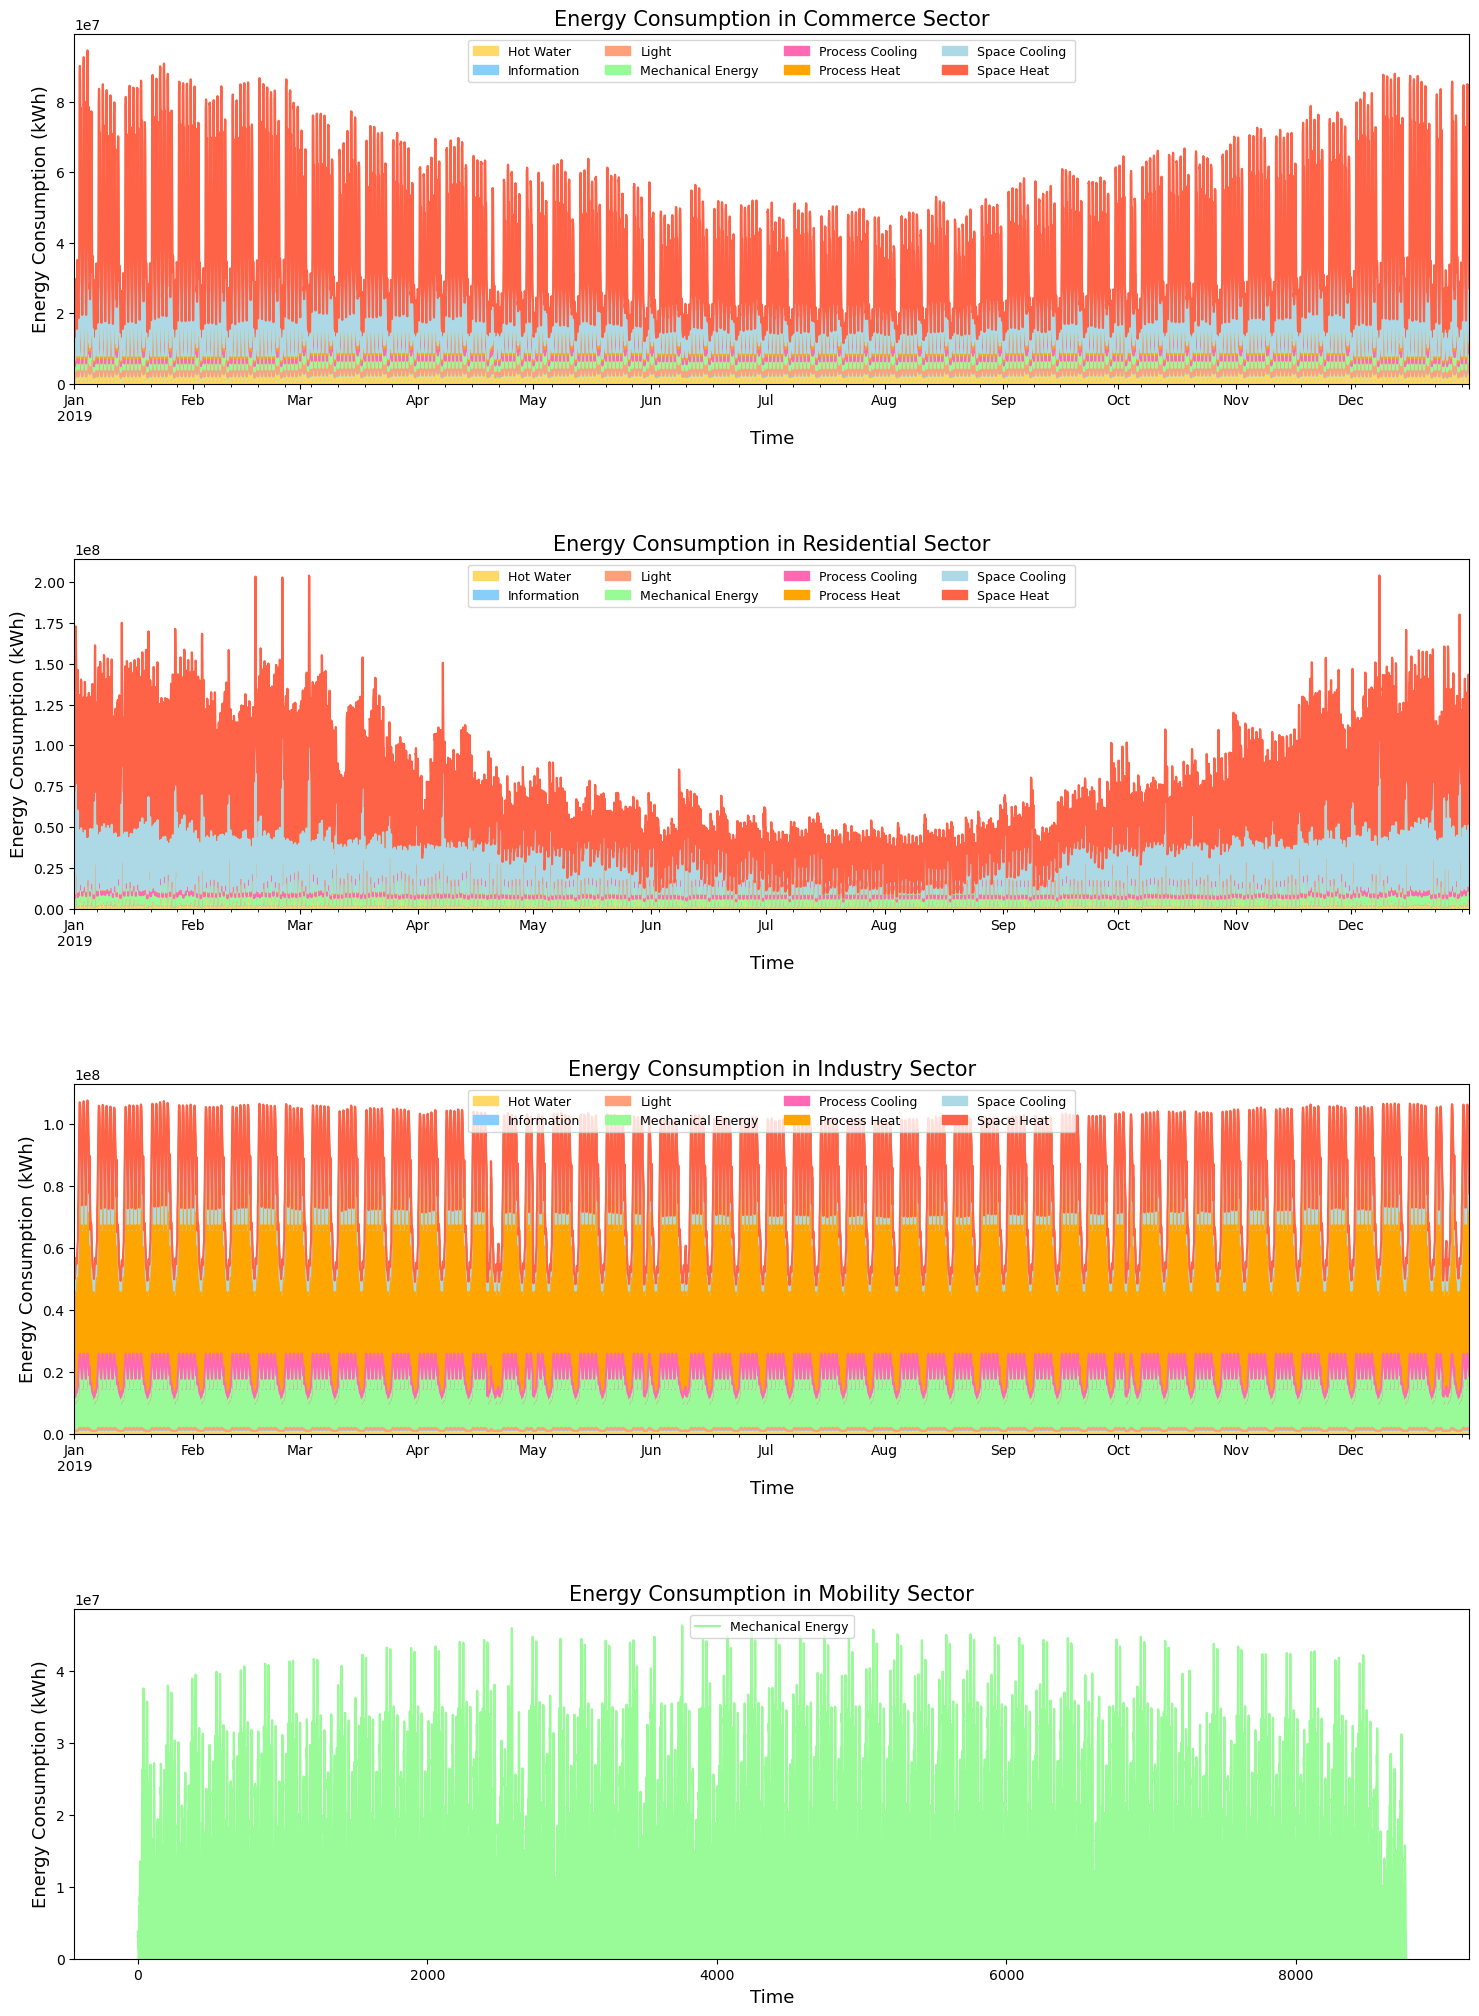

In [16]:
# Energy Consumption Analysis 

legend_energy_types = ['Hot Water' , 'Information', 'Light', 'Mechanical Energy','Process Cooling', 'Process Heat', 'Space Cooling ', 'Space Heat']
legend_mobility = ['Mechanical Energy']


colors = {
    'hotwater': '#FFD966',       # Soft Gold
    'information': '#87CEFA',    # Light Sky Blue
    'light': '#FFA07A',          # Light Salmon
    'mechanical': '#98FB98',     # Pale Green
    'process_cooling': '#FF69B4', # Hot Pink
    'process_heat': '#FFA500',   # Orange
    'space_cooling': '#ADD8E6',  # Light Blue
    'space_heat': '#FF6347'      # Tomato
}

# Convert the dict values to a list
colors_list = list(colors.values())

# Create custom legend handles
handles = [mpatches.Patch(color=colors_list[i], label=legend_energy_types[i]) for i in range(len(legend_energy_types))]

# Reorder the data frames to match the legend order
commercial_shape = commercial_shape[[it + '_commercial' for it in colors.keys()]]
residential_shape = residential_shape[[it + '_residential' for it in colors.keys()]]
industrial_shape = industrial_shape[[it + '_industry' for it in colors.keys()]]

# Create the subplots
f, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize=(18, 25))

# Plot the Commercial Sector
commercial_shape.plot(kind='area', ax=ax1, color=[colors[key] for key in colors.keys()])
ax1.legend(handles=handles, loc='upper center', fontsize=9, ncol=4)
ax1.set_title('Energy Consumption in Commerce Sector', fontsize=15)
ax1.set_xlabel('Time', fontsize=13)
ax1.set_ylabel('Energy Consumption (kWh)', fontsize=13)

# Plot the Residential Sector
residential_shape.plot(kind='area', ax=ax2, color=[colors[key] for key in colors.keys()])
ax2.legend(handles=handles, loc='upper center', fontsize=9, ncol=4)
ax2.set_title('Energy Consumption in Residential Sector', fontsize=15)
ax2.set_xlabel('Time', fontsize=13)
ax2.set_ylabel('Energy Consumption (kWh)', fontsize=13)

# Plot the Industrial Sector
industrial_shape.plot(kind='area', ax=ax3, color=[colors[key] for key in colors.keys()])
ax3.legend(handles=handles, loc='upper center', fontsize=9, ncol=4)
ax3.set_title('Energy Consumption in Industry Sector', fontsize=15)
ax3.set_xlabel('Time', fontsize=13)
ax3.set_ylabel('Energy Consumption (kWh)', fontsize=13)

# Plot the Mobility Sector
mob_shape['mobility_mechanical'].plot(kind='area', ax=ax4, color=[colors['mechanical']])
ax4.legend(['Mechanical Energy'], loc='upper center', fontsize=9, ncol=4)
ax4.set_title('Energy Consumption in Mobility Sector', fontsize=15)
ax4.set_xlabel('Time', fontsize=13)
ax4.set_ylabel('Energy Consumption (kWh)', fontsize=13)

plt.subplots_adjust(hspace=0.5)
plt.show()





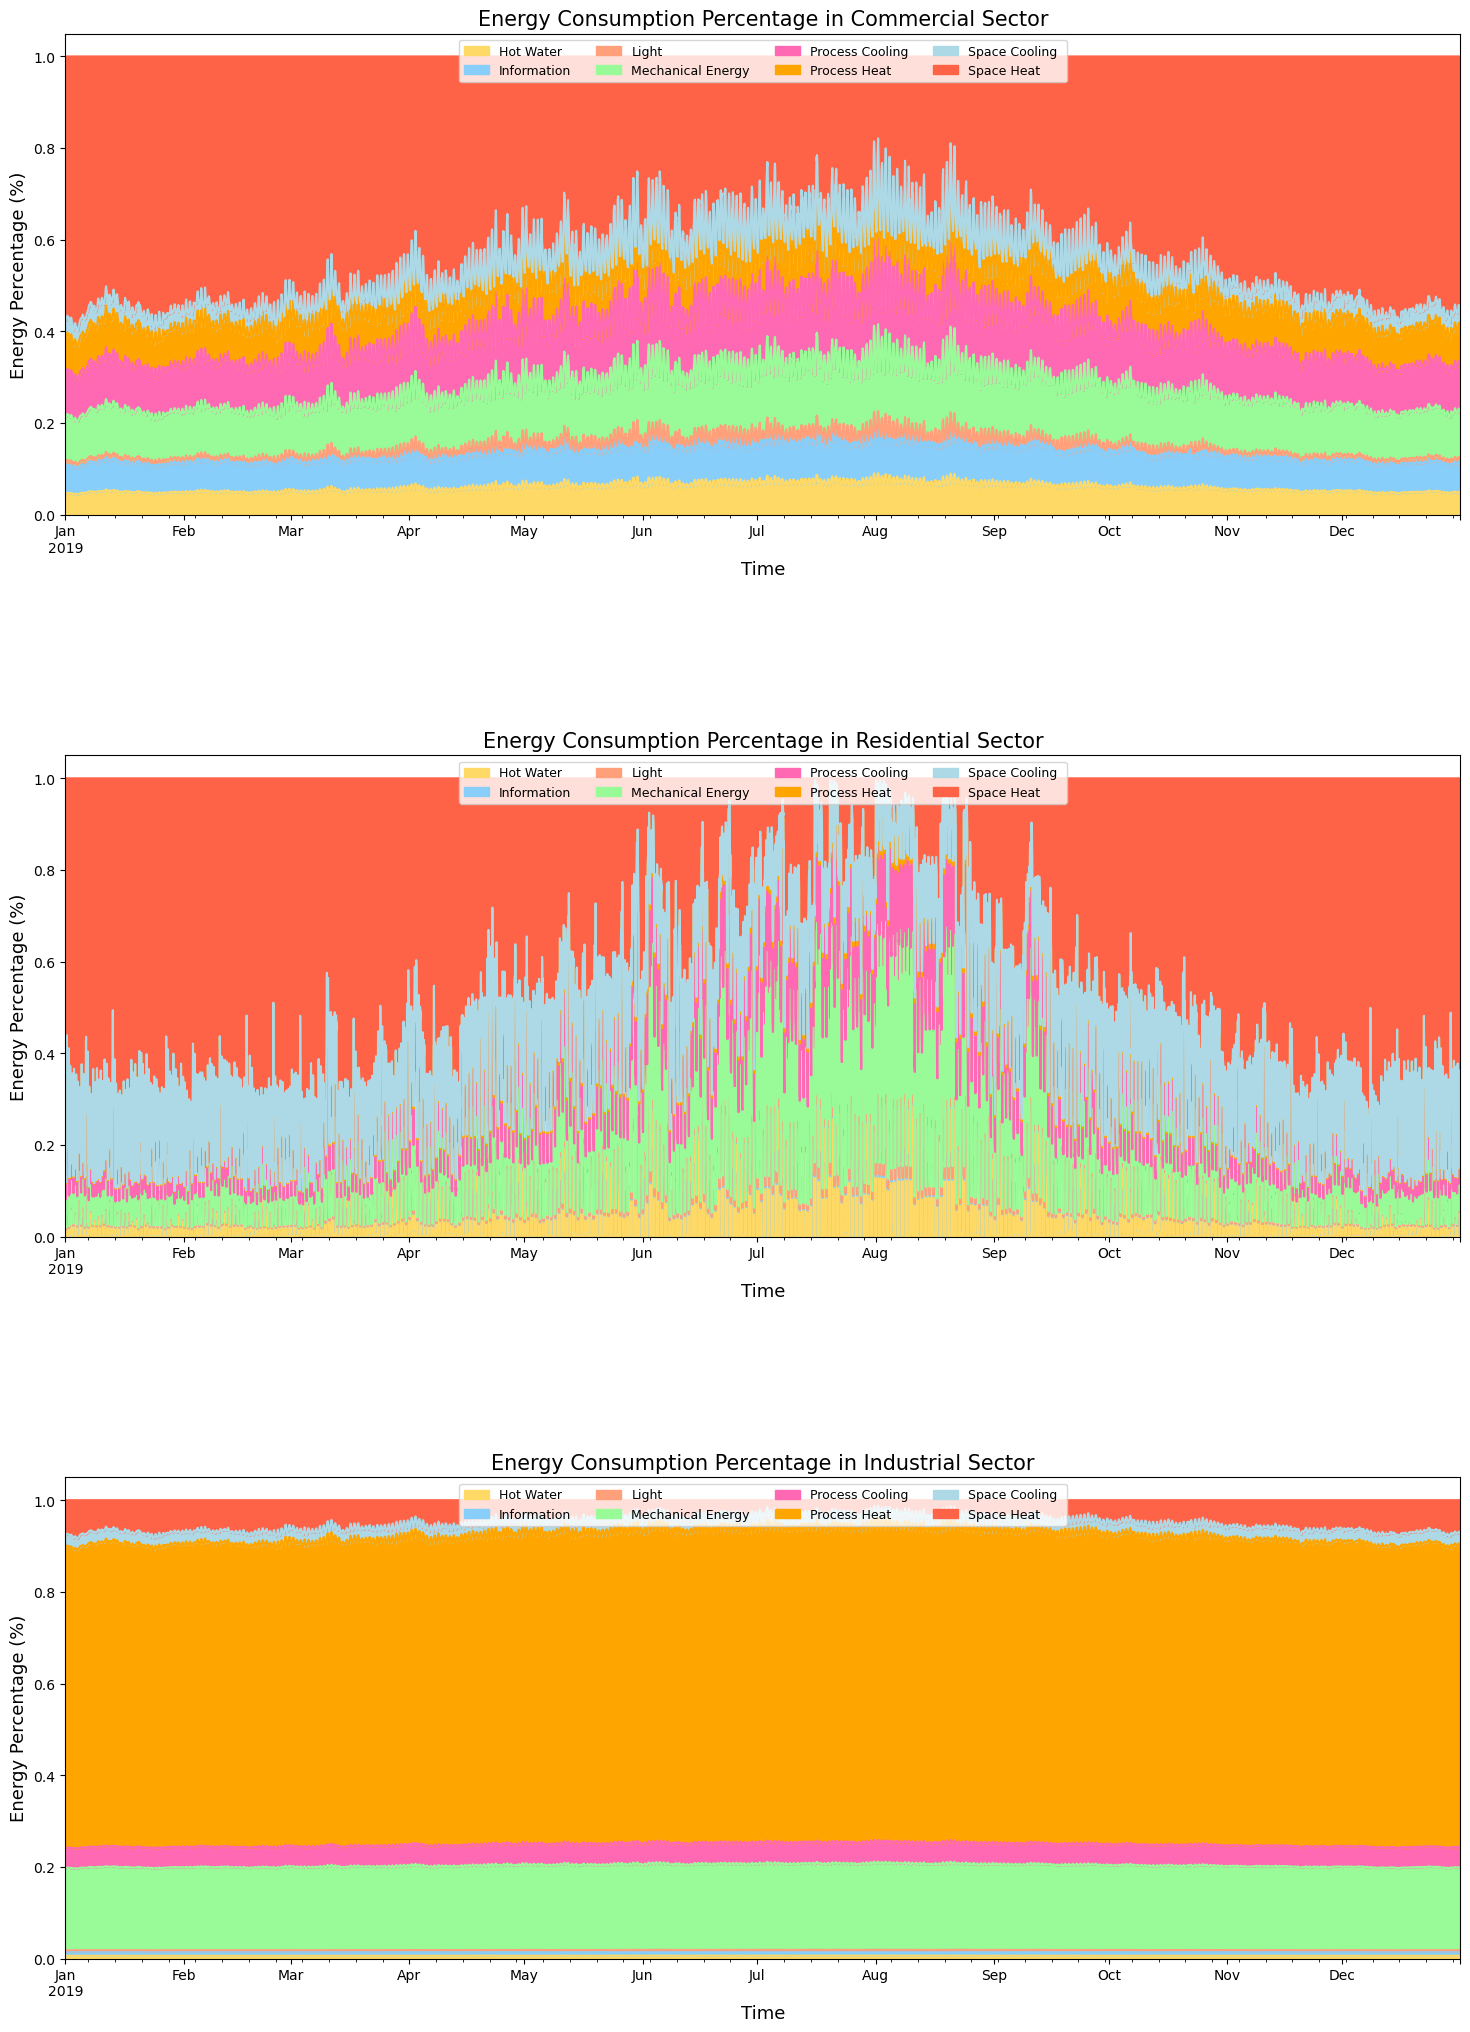

In [17]:
commercial_percentage = commercial_percentage[[it + '_commercial' for it in colors.keys()]]
percentage_residential = percentage_residential[[it + '_residential' for it in colors.keys()]]
percentage_industrial = percentage_industrial[[it + '_industry' for it in colors.keys()]]

# Energy Percentage Analysis 
f, [ax5, ax6, ax7] = plt.subplots(3, 1, figsize=(18, 25))

# Percentage of Commercial Graph
commercial_percentage.plot(kind='area', ax=ax5, color=[colors[key] for key in colors.keys()])
ax5.legend(handles=handles, loc='upper center', fontsize=9, ncol=4)
ax5.set_title('Energy Consumption Percentage in Commercial Sector', fontsize=15)
ax5.set_xlabel('Time', fontsize=13)
ax5.set_ylabel('Energy Percentage (%)', fontsize=13)

# Percentage of Residential Graph
percentage_residential.plot(kind='area', ax=ax6, color=[colors[key] for key in colors.keys()])
ax6.legend(handles=handles, loc='upper center', fontsize=9, ncol=4)
ax6.set_title('Energy Consumption Percentage in Residential Sector', fontsize=15)
ax6.set_xlabel('Time', fontsize=13)
ax6.set_ylabel('Energy Percentage (%)', fontsize=13)

# Percentage of Industrial Graph
percentage_industrial.plot(kind='area', ax=ax7, color=[colors[key] for key in colors.keys()])
ax7.legend(handles=handles, loc='upper center', fontsize=9, ncol=4)
ax7.set_title('Energy Consumption Percentage in Industrial Sector', fontsize=15)
ax7.set_xlabel('Time', fontsize=13)
ax7.set_ylabel('Energy Percentage (%)', fontsize=13)

plt.subplots_adjust(hspace=0.5)
plt.show()

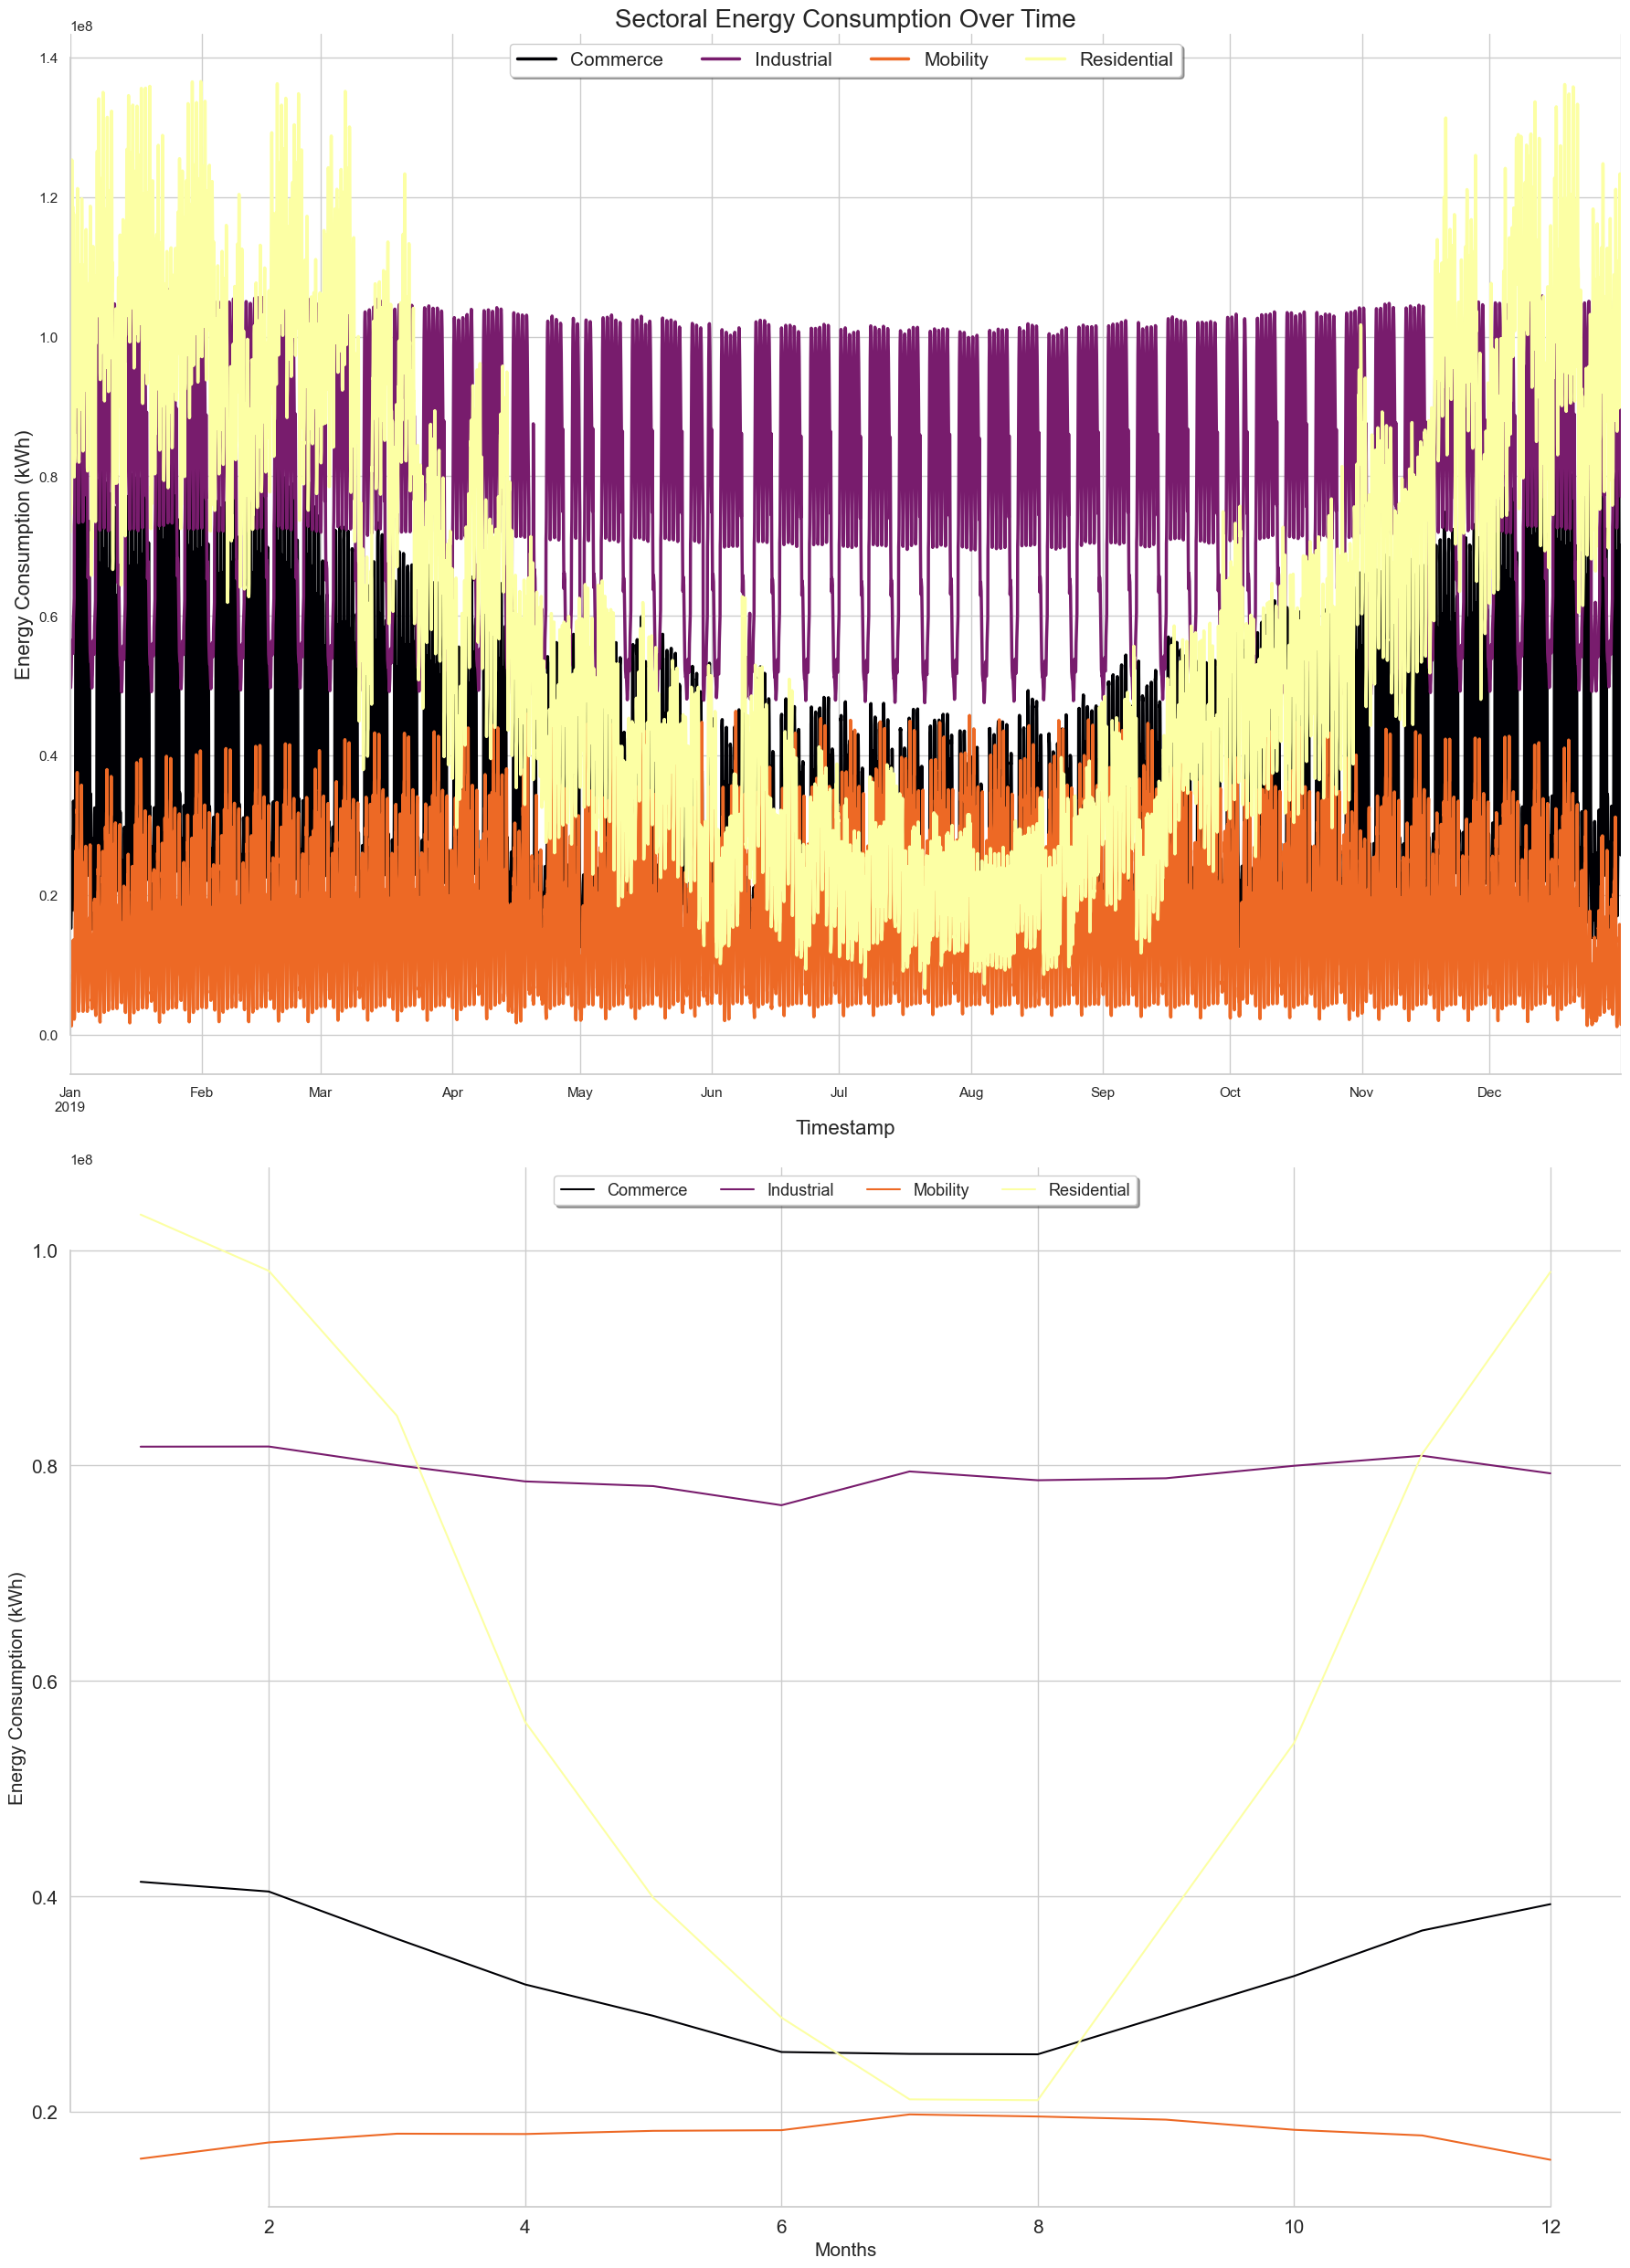

total_commercial  total_industrial  total_mobility  total_residential
month                                                                       
1          4.135063e+07      8.174509e+07    1.564605e+07       1.032912e+08
2          4.044817e+07      8.175915e+07    1.715477e+07       9.806940e+07
3          3.605409e+07      8.002538e+07    1.796693e+07       8.461073e+07
4          3.182162e+07      7.851922e+07    1.793622e+07       5.620797e+07
5          2.890867e+07      7.808385e+07    1.823263e+07       3.986726e+07

In [18]:
#Sectoral Comparison 


commercial_shape.reset_index(inplace=True)
industrial_shape.reset_index(inplace=True)
residential_shape.reset_index(inplace=True)

# Calculate total energy consumption for each sector
commercial_shape['total_commercial'] = commercial_shape.iloc[:, 2:].sum(axis=1)
industrial_shape['total_industrial'] = industrial_shape.iloc[:, 2:9].sum(axis=1)
residential_shape['total_residential'] = residential_shape.iloc[:, 2:9].sum(axis=1)

# Combine total energy consumption into one DataFrame
sectoral_total = commercial_shape.iloc[:, np.r_[0, -1]].copy()
sectoral_total['total_industrial'] = industrial_shape.iloc[:, -1].copy()
sectoral_total['total_mobility'] = mob_shape.iloc[:, -1].copy()
sectoral_total['total_residential'] = residential_shape.iloc[:, -1].copy()

# Ensure 'timestamp' column is in datetime format
sectoral_total['timestamp'] = pd.to_datetime(sectoral_total['timestamp'], errors='coerce')

# Drop rows with invalid or missing timestamps
sectoral_total.dropna(subset=['timestamp'], inplace=True)

sectoral_total.to_csv("sectoral_training.csv",index = False)

# Set up the plot
sns.set(style='whitegrid')
fig, [ax, ax2] = plt.subplots(2, 1, figsize=(18, 25))

# Plot sectoral energy consumption over time
sectoral_total.set_index('timestamp').plot(ax=ax, cmap='inferno', linewidth=2.5)
ax.set_title('Sectoral Energy Consumption Over Time', fontsize=20)
ax.set_xlabel('Timestamp', fontsize=16)
ax.set_ylabel('Energy Consumption (kWh)', fontsize=16)

# Legend settings
sectoral_legend = ['Commerce', 'Industrial', 'Mobility', 'Residential']
ax.legend(sectoral_legend, loc='upper center', fontsize=15, ncol=4, frameon=True, fancybox=True, shadow=True)
plt.xticks(rotation=45)

# Calculate monthly average energy consumption
monthly_consumption = sectoral_total.copy()
monthly_consumption['month'] = monthly_consumption['timestamp'].dt.month
monthly_consumption = monthly_consumption.groupby('month').mean()
# Drop rows with invalid or missing timestamps
monthly_consumption = monthly_consumption.drop(['timestamp'], axis=1)

# Plot monthly energy consumption
monthly_consumption.plot(ax=ax2, cmap='inferno', fontsize=15)
ax2.set_xlabel('Months', fontsize=15)
ax2.set_ylabel('Energy Consumption (kWh)', fontsize=15)
ax2.legend(sectoral_legend, loc='upper center', fontsize=13, ncol=4, frameon=True, fancybox=True, shadow=True)

# Final plot adjustments
sns.despine(trim=True)
plt.tight_layout()
plt.show()

monthly_consumption.head()




 

In [19]:
# Visualization according to NUTS2_regions 
NUTS2_regions = ['Stuttgart', 'Karlsruhe', 'Freiburg', 'Tübingen', 'Oberbayern', 'Niederbayern', 'Oberpfalz', 'Oberfranken',
              'Mittelfranken', 'Unterfranken', 'Schwaben', 'Berlin', 'Brandenburg', 'Bremen', 'Hamburg', 'Darmstadt',
              'Gießen', 'Kassel', 'Mecklenburg-Vorpommern', 'Braunschweig', 'Hannover', 'Lüneburg', 'Weser-Ems',
              'Düsseldorf', 'Köln', 'Münster', 'Detmold', 'Arnsberg', 'Koblenz', 'Trier', 'Rheinhessen-Pfalz', 'Saarland',
              'Dresden', 'Chemnitz', 'Leipzig', 'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen']


commercial_regions = comdf1.iloc[:,0:39]
industry_regions = indf1.iloc[:,0:39]
residential_regions = resdf1.iloc[:,0:39]

comdf_regional = pd.concat([commercial_regions,comdf2,comdf3,comdf4,comdf5,comdf6,comdf7,comdf8])
indf_regional = pd.concat([industry_regions,indf2,indf3,indf4,indf5,indf6,indf7,indf8])
resdf_regional = pd.concat([residential_regions,resdf2,resdf3,resdf4,resdf5,resdf6,resdf7,resdf8])
mobdf_regional = mob_df.iloc[:,0:39]
mobdf_regional = mobdf_regional.drop(['Unnamed: 0'],axis = 1)
      
commercial_analysis = comdf_regional.iloc[:, 2:].T.reset_index(False)
industrial_analysis =indf_regional.iloc[:, 1:].T.reset_index(False)
residential_analysis = resdf_regional.iloc[:, 1:].T.reset_index(False)
mobility_analysis = mobdf_regional.iloc[:, 1:].T.reset_index(False)


#Comercial Data Processing
commercial_analysis["total_commercial"] = commercial_analysis.iloc[:,1:].sum(axis = 1)
commercial_analysis.drop(commercial_analysis.iloc[:,1:-1].columns,axis=1, inplace = True)
commercial_analysis.rename(columns={"index" : "NUTS2"},inplace = True)
commercial_analysis["total_kWh_commercial"] = round(commercial_analysis["total_commercial"],3)

#İndustry Data Processing
industrial_analysis["total_industry"] = industrial_analysis.iloc[:,1:].sum(axis = 1)
industrial_analysis.drop(industrial_analysis.iloc[:,1:-1].columns,axis=1, inplace = True)
industrial_analysis.rename(columns={"index" : "NUTS2"},inplace = True)
industrial_analysis["total_kWh_industry"] = round(industrial_analysis["total_industry"],3)

#Residential Data Processing
residential_analysis["total_residential"] = residential_analysis.iloc[:,1:].sum(axis = 1)
residential_analysis.drop(residential_analysis.iloc[:,1:-1].columns,axis=1, inplace = True)
residential_analysis.rename(columns={"index" : "NUTS2"},inplace = True)
residential_analysis["total_kWh_residential"] = round(residential_analysis["total_residential"],3)

#Mobility Data Processing
mobility_analysis["total_mobility"] = mobility_analysis.iloc[:,1:].sum(axis = 1)
mobility_analysis.drop(mobility_analysis.iloc[:,1:-1].columns,axis=1, inplace = True)
mobility_analysis.rename(columns={"index" : "NUTS2"},inplace = True)
mobility_analysis["total_kWh_mobility"] = round(mobility_analysis["total_mobility"],3)

#Regional Analysis
#sectoral distribution
regional_analysis_df = commercial_analysis[["NUTS2","total_kWh_commercial"]]
regional_analysis_df["total_kWh_industry"]= industrial_analysis["total_kWh_industry"]
regional_analysis_df["total_kWh_residential"] = residential_analysis["total_kWh_residential"]
regional_analysis_df["total_kWh_mobility"] = mobility_analysis["total_kWh_mobility"]
regional_analysis_df["total"] = regional_analysis_df.iloc[:,1:].sum(axis=1)

regional_analysis_df["NUTS2_regions"] = NUTS2_regions #assigned NUTS2 region names


#creating regional data
regional_dir = 'regional_distribution'
os.makedirs(regional_dir, exist_ok=True)

comdf_regional.to_csv("regional_distribution/commercial_energy_cities.csv", index = False )
resdf_regional.to_csv("regional_distribution/residential_energy_cities.csv", index = False )
indf_regional.to_csv("regional_distribution/industrial_energy_cities.csv", index = False )
mobdf_regional.to_csv("regional_distribution/mobility_energy_cities.csv", index = False )

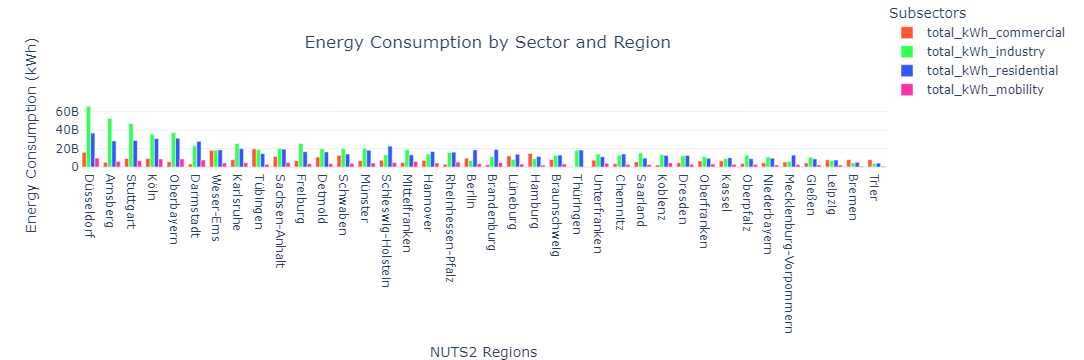

In [20]:
#VISUALIZATION PART

fig = px.bar( 
    regional_analysis_df,
    x = "NUTS2_regions",
    y = ["total_kWh_commercial", "total_kWh_industry","total_kWh_residential","total_kWh_mobility"],
    color_discrete_sequence = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1'],
    title = "Energy Consumption by NUTS2 Regions",
    labels = {"NUTS2_regions":"Region", "value": "Energy Consumption (kWh)","variable":"Sector"},
    template = "plotly_white"
)

fig.update_layout(
    xaxis_title = "NUTS2 Regions",
    yaxis_title = "Energy Consumption (kWh)",
    legend_title = "Subsectors",
    barmode = "group",
    title = {
        "text":"Energy Consumption by Sector and Region",
        "y":0.9,
        "x":0.45,
        "xanchor": "center",
        "yanchor": "top",   
    },
    xaxis = {"categoryorder" : "total descending"},
    legend=dict(
        orientation="v",  
        x=1.0,  
        y=3.0,  
        traceorder="normal",  
        tracegroupgap=10  
    )
)
fig.show()